# Notebook 04: Supervised Learning - Classification Models

## 1. Objective
This notebook implements and evaluates various supervised learning classification models to predict heart disease. The goals are to:
- Train multiple classification algorithms on the selected features
- Evaluate and compare model performance using appropriate metrics
- Identify the best-performing model for heart disease prediction
- Analyze model strengths and weaknesses

## 2. Introduction to Classification Models
Supervised learning involves training models on labeled data to make predictions. For this binary classification task (heart disease vs no heart disease), we evaluate several algorithms:

**Models Implemented:**
- Logistic Regression: Linear model for probability estimation
- Decision Trees: Non-linear model with interpretable rules
- Random Forest: Ensemble method combining multiple decision trees
- Support Vector Machines: Finds optimal hyperplane for separation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv("../data/03_data_selected_features.csv")
X = df.drop("target", axis=1)
y = df["target"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}
results = []

In [5]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append([name, acc, prec, rec, f1, auc])

In [6]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC"])
print(results_df)

                 Model  Accuracy  Precision    Recall        F1   ROC-AUC
0  Logistic Regression  0.852459   0.806452  0.892857  0.847458  0.935065
1        Decision Tree  0.721311   0.657143  0.821429  0.730159  0.728896
2        Random Forest  0.852459   0.806452  0.892857  0.847458  0.941017
3                  SVM  0.704918   0.727273  0.571429  0.640000  0.781385


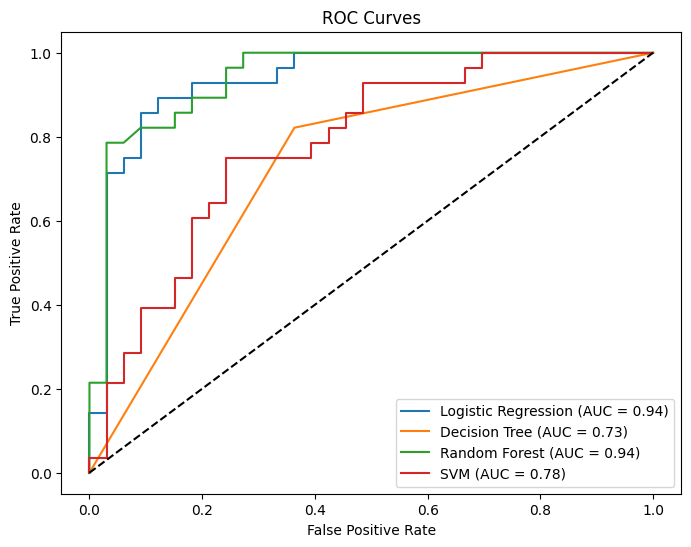

In [7]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

In [8]:
results_df.to_csv("../results/evaluation_metrics.csv", index=False)

In [9]:
import joblib

joblib.dump(models["Logistic Regression"], "../models/log_reg.pkl")
joblib.dump(models["Random Forest"], "../models/random_forest.pkl")

['../models/random_forest.pkl']